<h1 align="center">Partículas cuánticas con espín 1/2 sometidas a un campo magnético externo B</h1>
<div align="right">David A. Miranda, PhD<br>2021<br>Actualizado el 24 de noviembre de 2022<br>Actualizado el 23 de septiembre de 2023</div>


## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import constants as ct
from scipy.special import gamma as Gamma
import itertools as it

## 2. Planteamiento del problema

Sea un sistema aislado formado por $N$ partículas cuánticas con espñin $s=1/2$ cuya interacción entre si puede despreciarse, es decir, el sistema se puede modelar como un gas ideal.  Se asume que cada partícula tiene un momento magnético $\vec{\mu}$ cuya magnitud está dada por, 

$$\mu = g \frac{q_e}{2 m_e}S$$

Donde $g_s = 2.00231930436$, $q_e$, la carga del electrón, $m_e$, la masa del electrón y $S=\hbar/2$, el momento espín.

Al aplicar un campo magnético externo $\vec{B}$, una cierta partícula cuánticas se pueden alinear con el campo magnético paralela o antiparalela a este.  Si se asume que $n_1$ partículas se alinean con el campo y el resto, $n_2 = N - n_1$, en sentido contrario, la energía del sistema estará dada por $ E = - (n_1 - n_2) \mu B $.

Entonces, el número de estados con energía entre $E$ y $E + \delta E$ está dado por.

$$\Omega(E) = \frac{N!}{\left(\frac{N}{2}-\frac{E}{2\mu B} \right)! \left( \frac{N}{2} + \frac{E}{2\mu B} \right)!} \frac{\delta E}{2\mu B} \qquad \qquad (1)$$

Ver [aquí](https://youtu.be/yFWxy3Rlhw0) más detalles del planteamiento y la obtención de la ecuación anterior.

a) ¿Cuál es la relación entre la energía $E$ y la temperatura $T$?

b) ¿Bajo cuáles consideraciones la temperatura $T$ es negativa?

c) ¿Cómo depende la magnetización $M$ de la temperatura?



## 3. Expresiones para la energía $E$ y magnetización $M$

### 3.1. Energía y temperatura

A partir de la ecuación (1), teniendo en cuenta que $(k_B T)^{-1} = \frac{\partial ln \Omega}{\partial E}$ y haciendo unas consideraciones de orden de maginitud, se obtiene,

$$E = - N B \mu \quad tanh \left( \frac{\mu B}{k_B T} \right) \qquad \qquad (2)$$

### 3.2. Magnetización y temperatura

La magnetización $M$ es igual al número de momentos magnéticos por unidad de volumen, que para este caso está dada por:

$$M = \frac{-E}{B} = N \mu \quad tanh \left( \frac{\mu B}{k_B T} \right) \qquad \qquad (3)$$

## 4. Definiciones y métodos

In [2]:
N = np.r_[100, 10000]
B = np.r_[0.01, 0.1, 0.5]  # T
T = np.linspace(-1, 1, 1000) # K
q = 2.00231930436
S = ct.hbar/2 # J s
mu = q * ct.e * S / (2 * ct.m_e)
kB = ct.k

In [3]:
def energy(N, B):
    Emax = mu * B * N
    return np.linspace(0, Emax, 1000)

In [4]:
def omega(E, N, B, delta_E=0):
    if delta_E == 0:
        delta_E = min(np.diff(E))
    N_ = E/(mu*B)
    n1 = Gamma( 1 + N )
    d1 = Gamma( 1 + N/2 - N_/2)
    d2 = Gamma( 1 + N/2 + N_/2)
    return delta_E, n1 * delta_E / (2 * mu * B * d1 * d2)

In [5]:
def ln_omega(E, N, B):
    n1 = N/2 - E / (2*mu*B)
    n2 = N/2 + E / (2*mu*B)
    return N*np.log(N) - ( n1*np.log(n1) + n2*np.log(n2) )

In [6]:
def system_energy(N, B, T):
    beta = 1 / (kB * T)
    return - N * mu * B * np.tanh(beta * mu * B)

In [7]:
def magnetization(N, B, T): 
    beta = 1 / (kB * T)
    return N * mu * np.tanh(beta * mu * B)

## 5. Figuras

### 5.1. Relación entre $ln (\Omega)$ y $E$

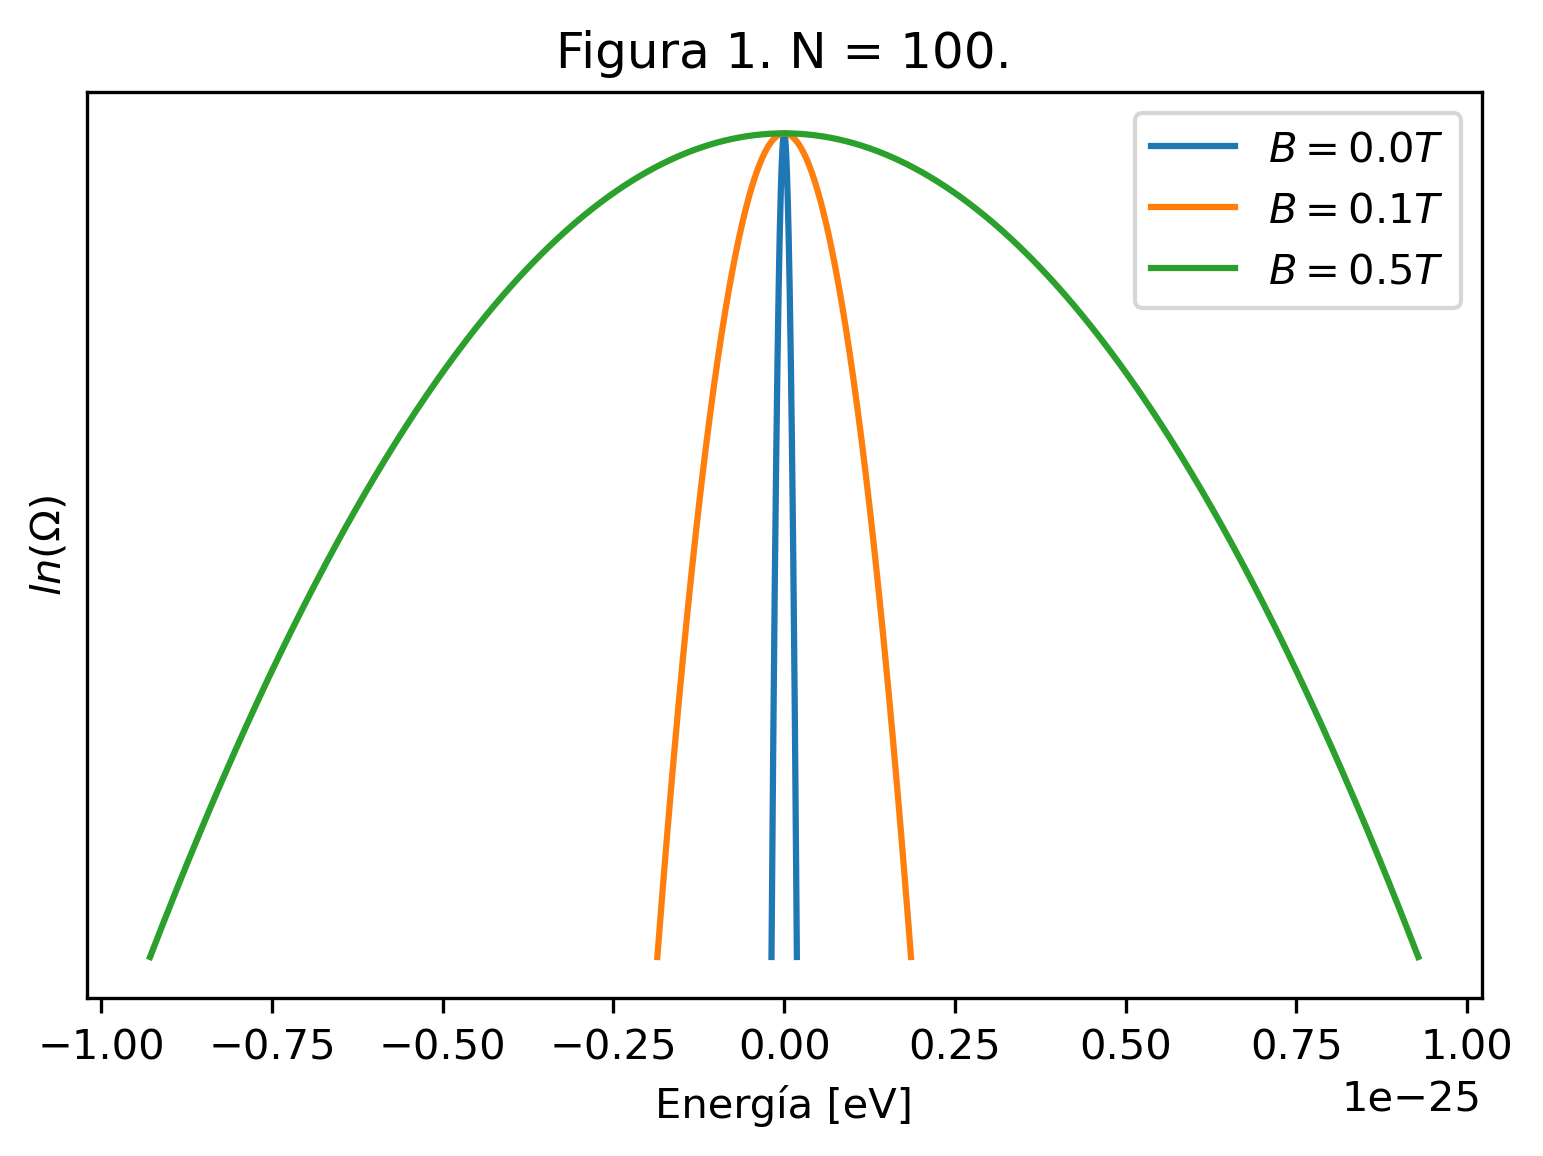

In [8]:
fig = {}; idx=0
for n, b in it.product([N[0]], B):
    Eo = mu*b/n
    E = np.linspace(-2*Eo, 2*Eo, 1000)

    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (fig[n], n))
    plt.plot(E, ln_omega(E, n, b), label=r'$B = %0.1f T$' % (b))
    plt.xlabel('Energía [eV]')
    plt.ylabel(r'$ln(\Omega)$')
    plt.yticks([])
    _ = plt.legend()

### 5.2. Energía en función de la temperatura

#### 5.2.1. Sin ninguna suposición sobre continuidad en la energía para temperaturas absolutas negativas

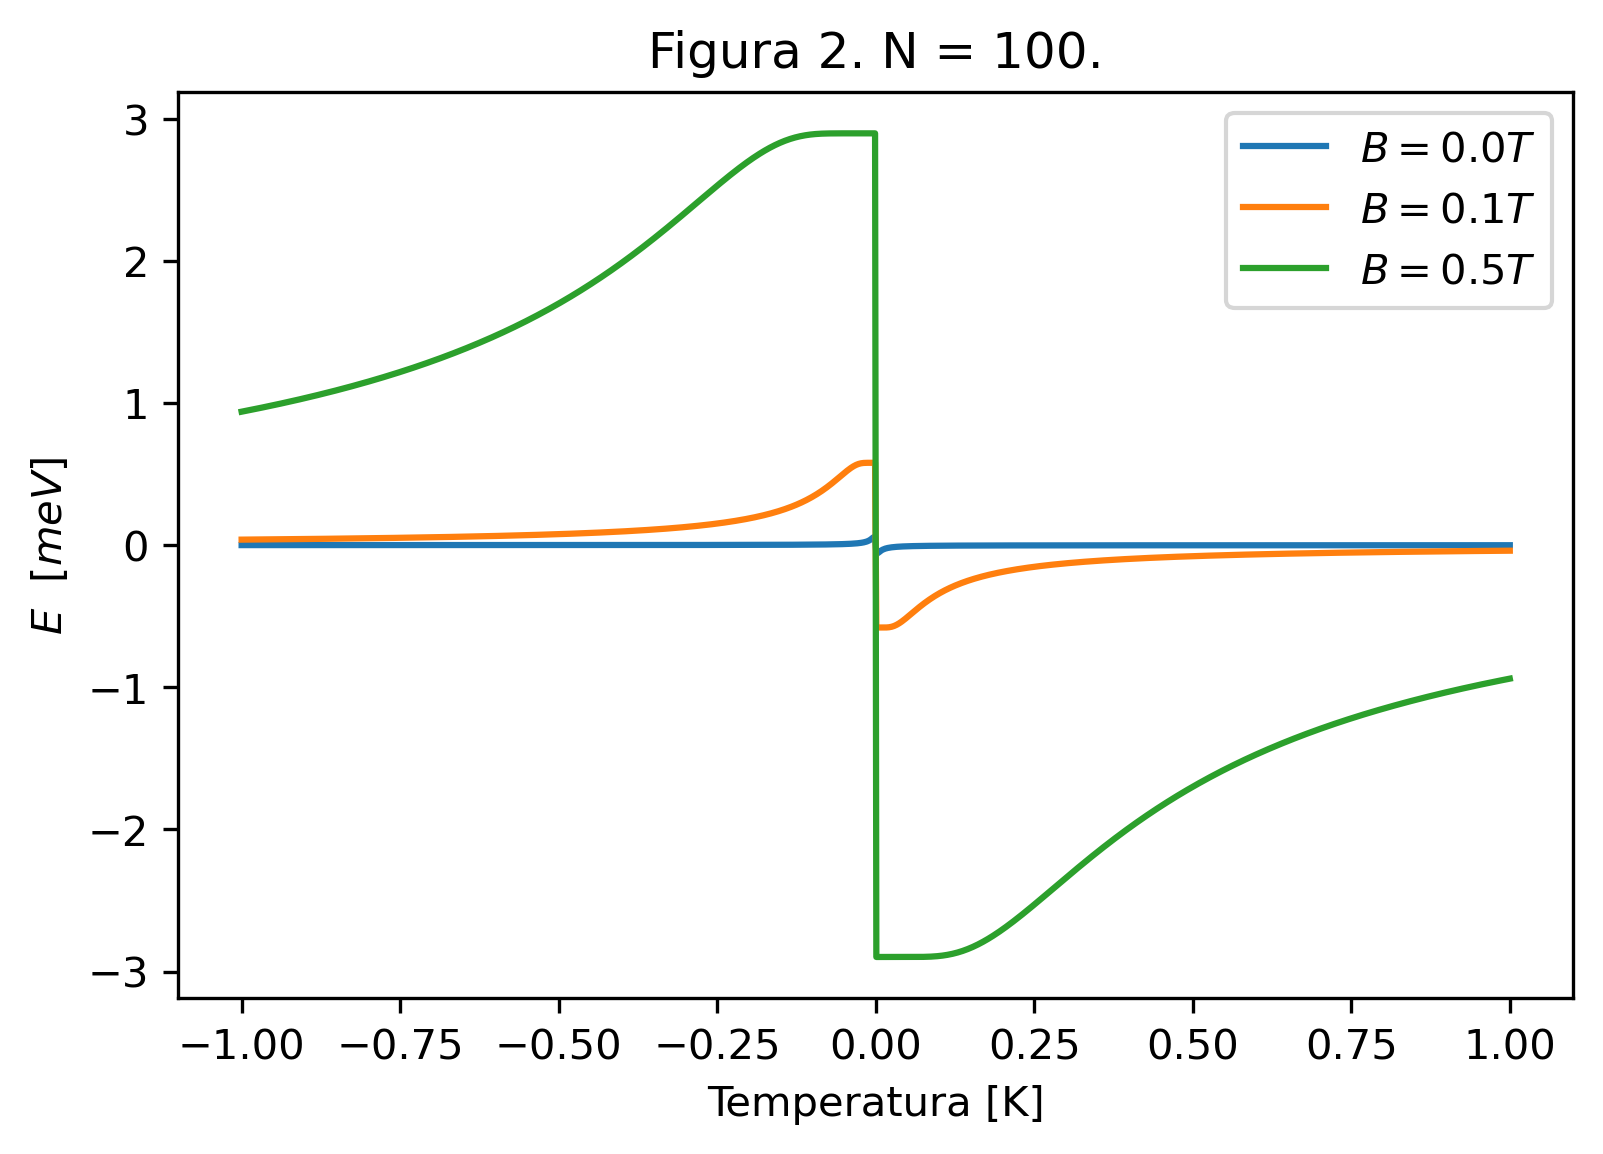

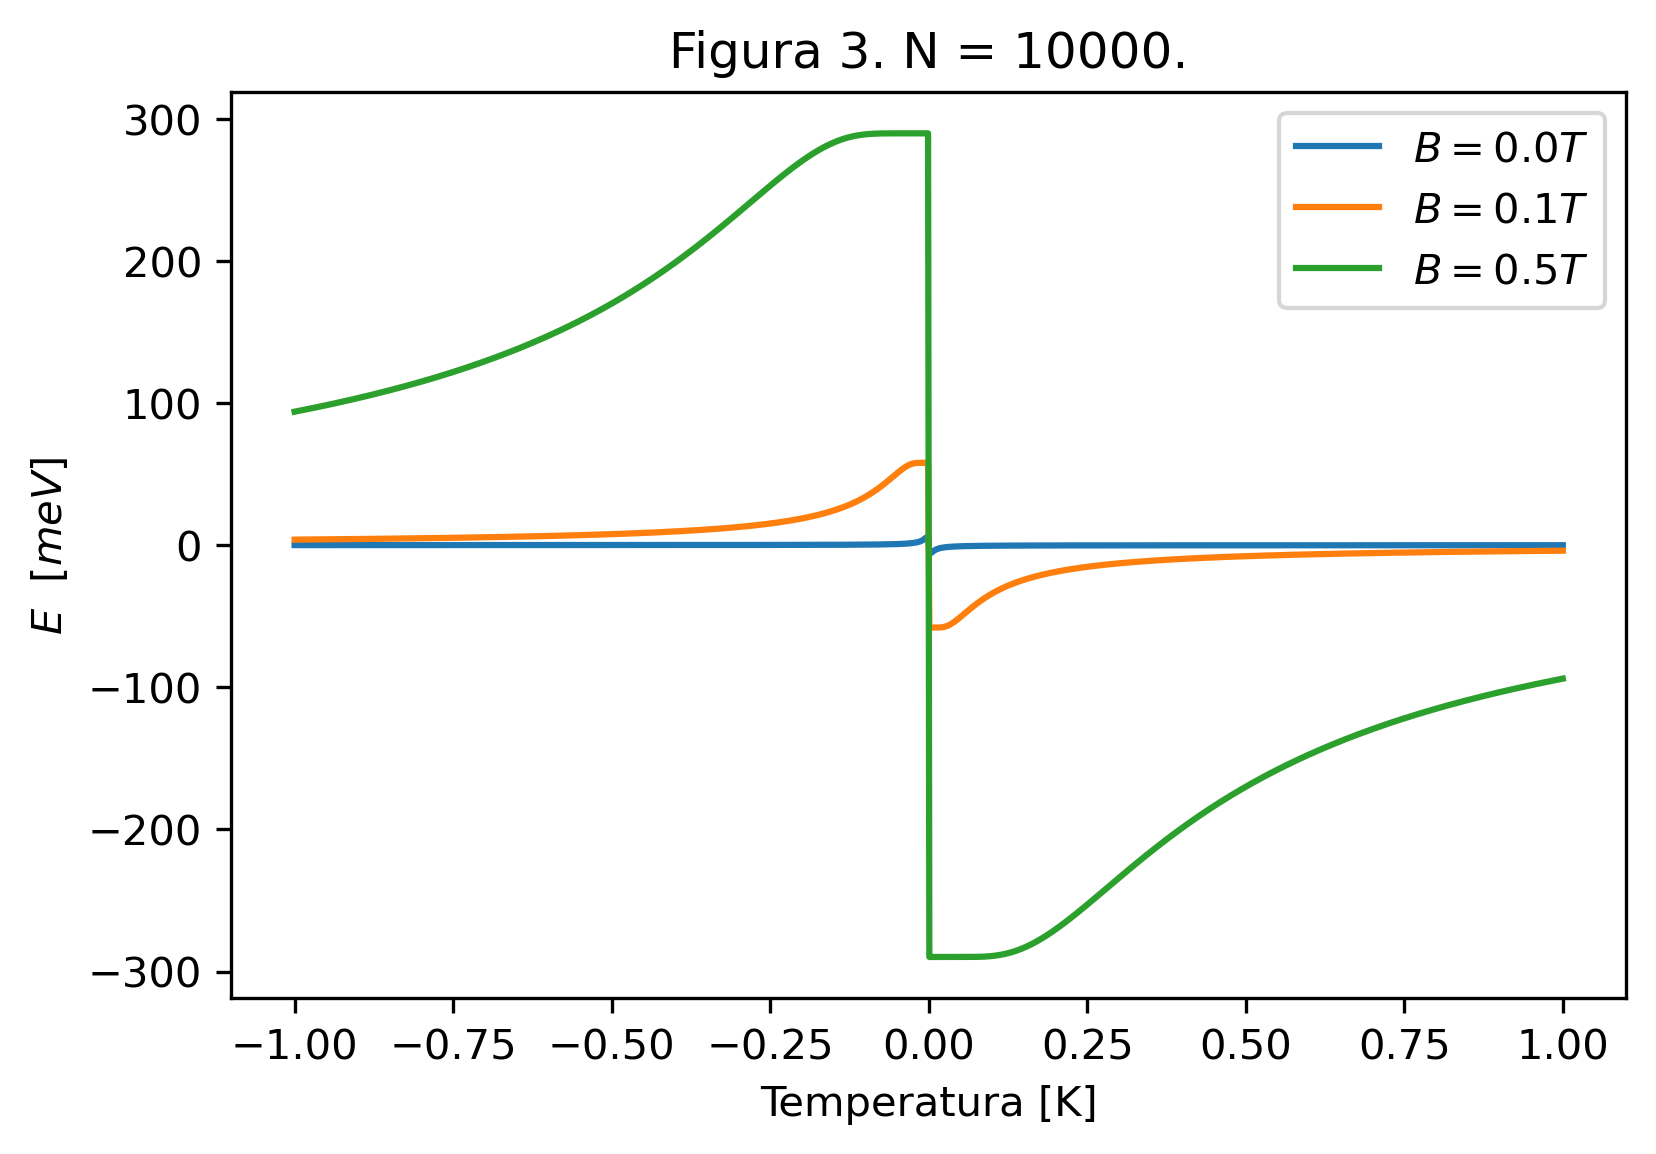

In [9]:
last_idx = idx
fig = {}; idx = 0
for n, b in it.product(N, B):
    E = system_energy(n, b, T) 
    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (last_idx+fig[n], n))
    plt.plot(T, 1e3 * E / ct.e, label=r'$B = %0.1f T$' % (b))
    plt.xlabel('Temperatura [K]')
    plt.ylabel(r'$E$  $[m eV]$')
for i in range(idx):
    plt.figure(i+1)
    _ = plt.legend()

#### 5.2.2. Suposición de continuidad en la energía cuando la temperatura absoluta es negativa

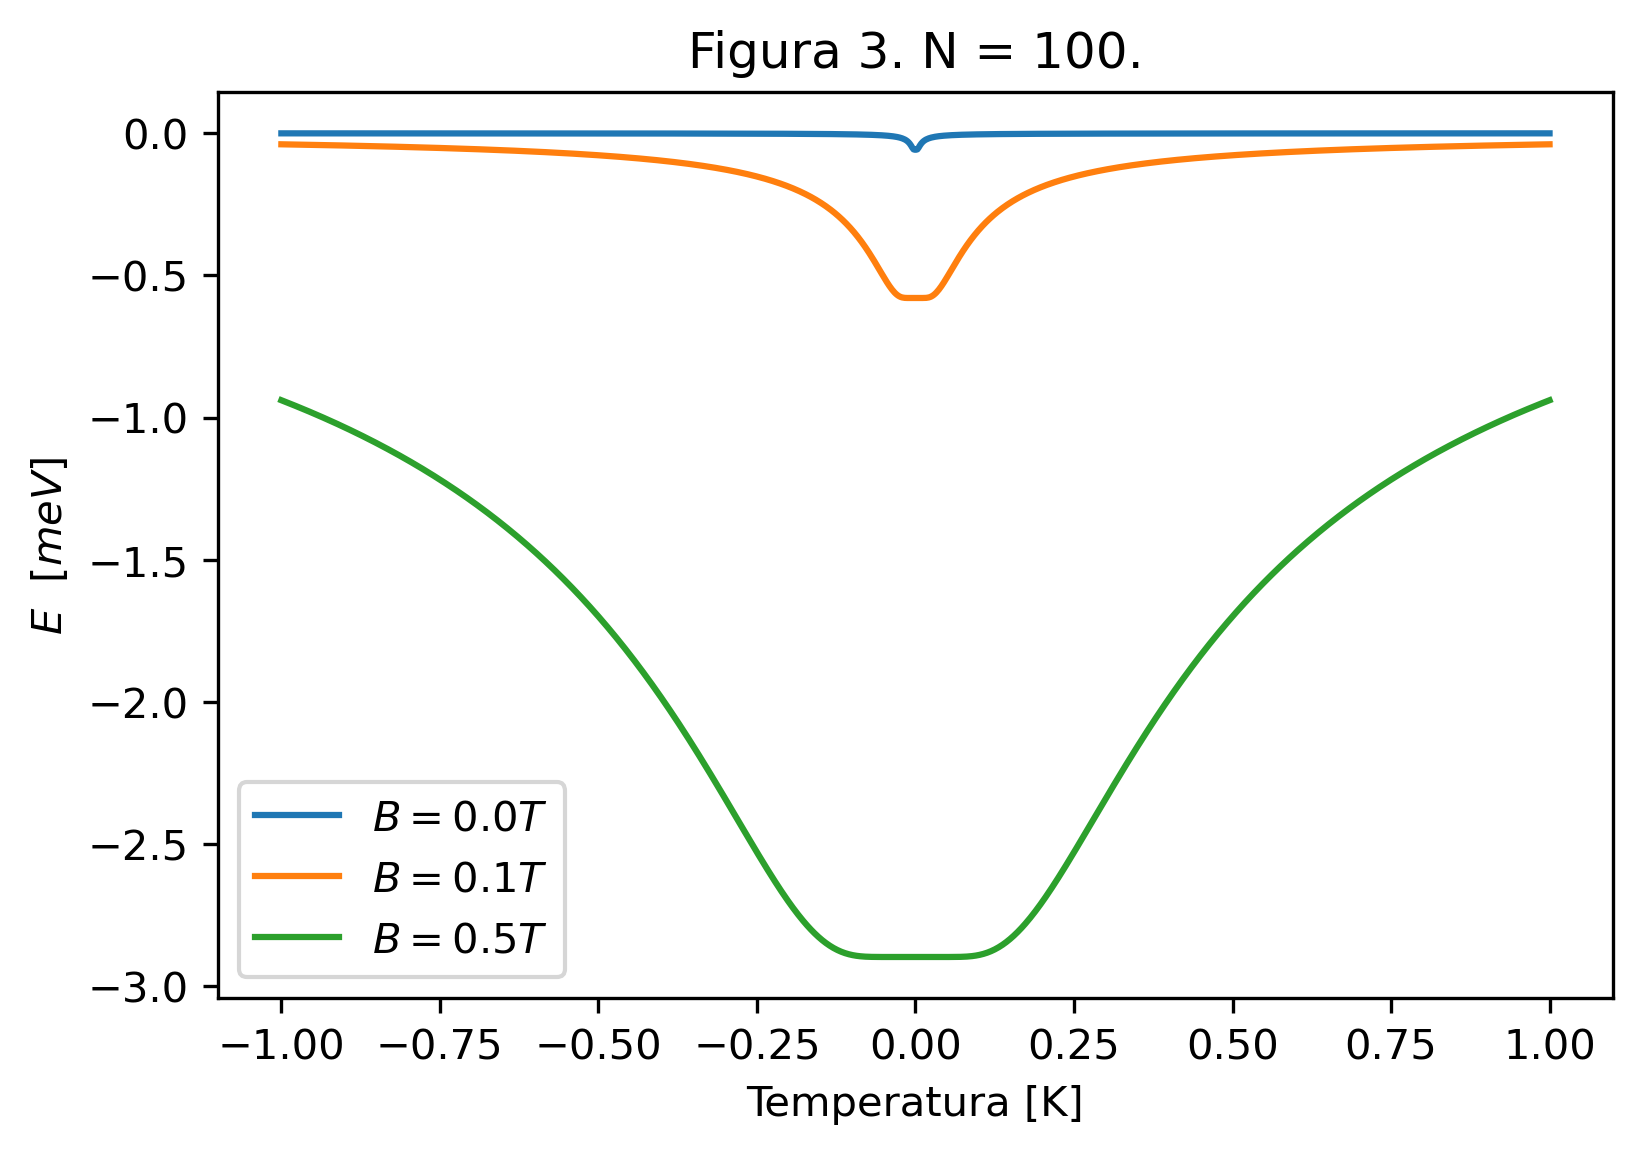

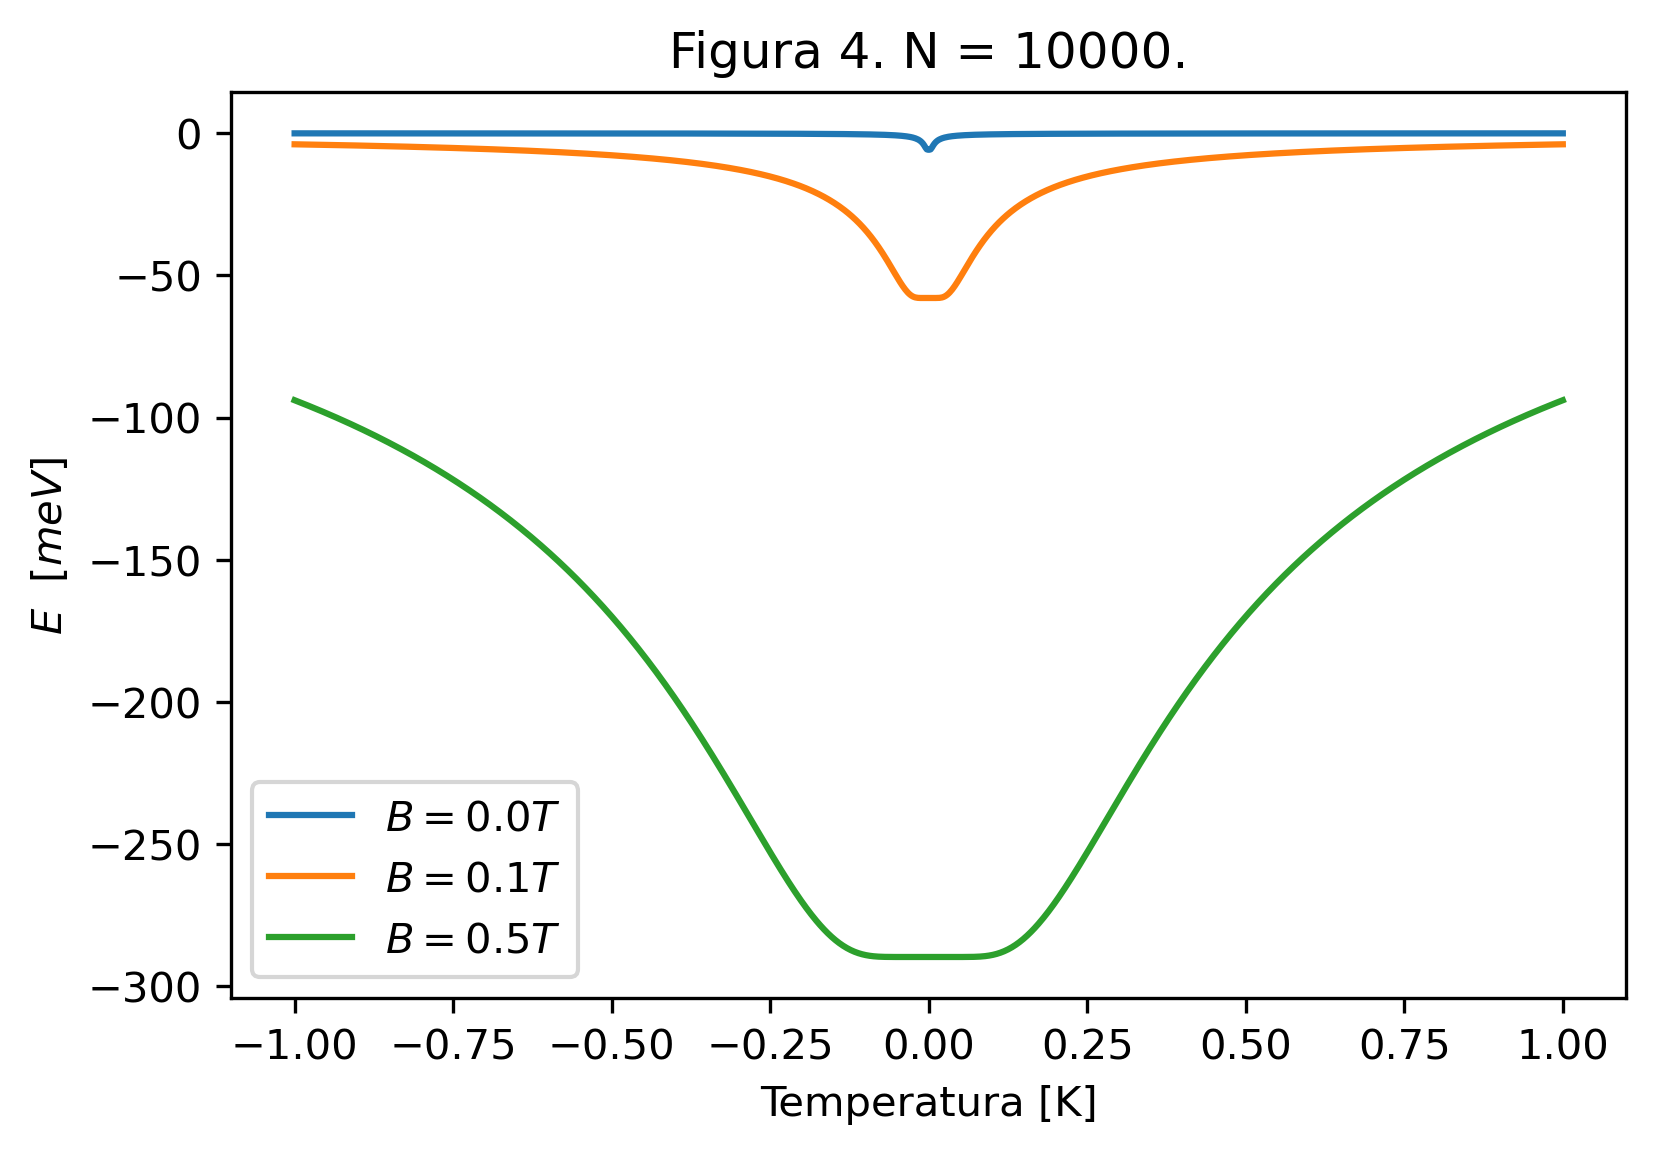

In [10]:
last_idx = idx
fig = {}; idx = 0
for n, b in it.product(N, B):
    E = system_energy(n, b, T) 
    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (last_idx+fig[n], n))
    energy = 1e3 * E / ct.e
    energy[T<0] *= -1
    plt.plot(T, energy, label=r'$B = %0.1f T$' % (b))
    plt.xlabel('Temperatura [K]')
    plt.ylabel(r'$E$  $[m eV]$')
for i in range(idx):
    plt.figure(i+1)
    _ = plt.legend()

### 5.3. Magnetización en función de la temperatura

#### 5.3.1. Sin ninguna suposición sobre continuidad en la magnetización para temperaturas absolutas negativas

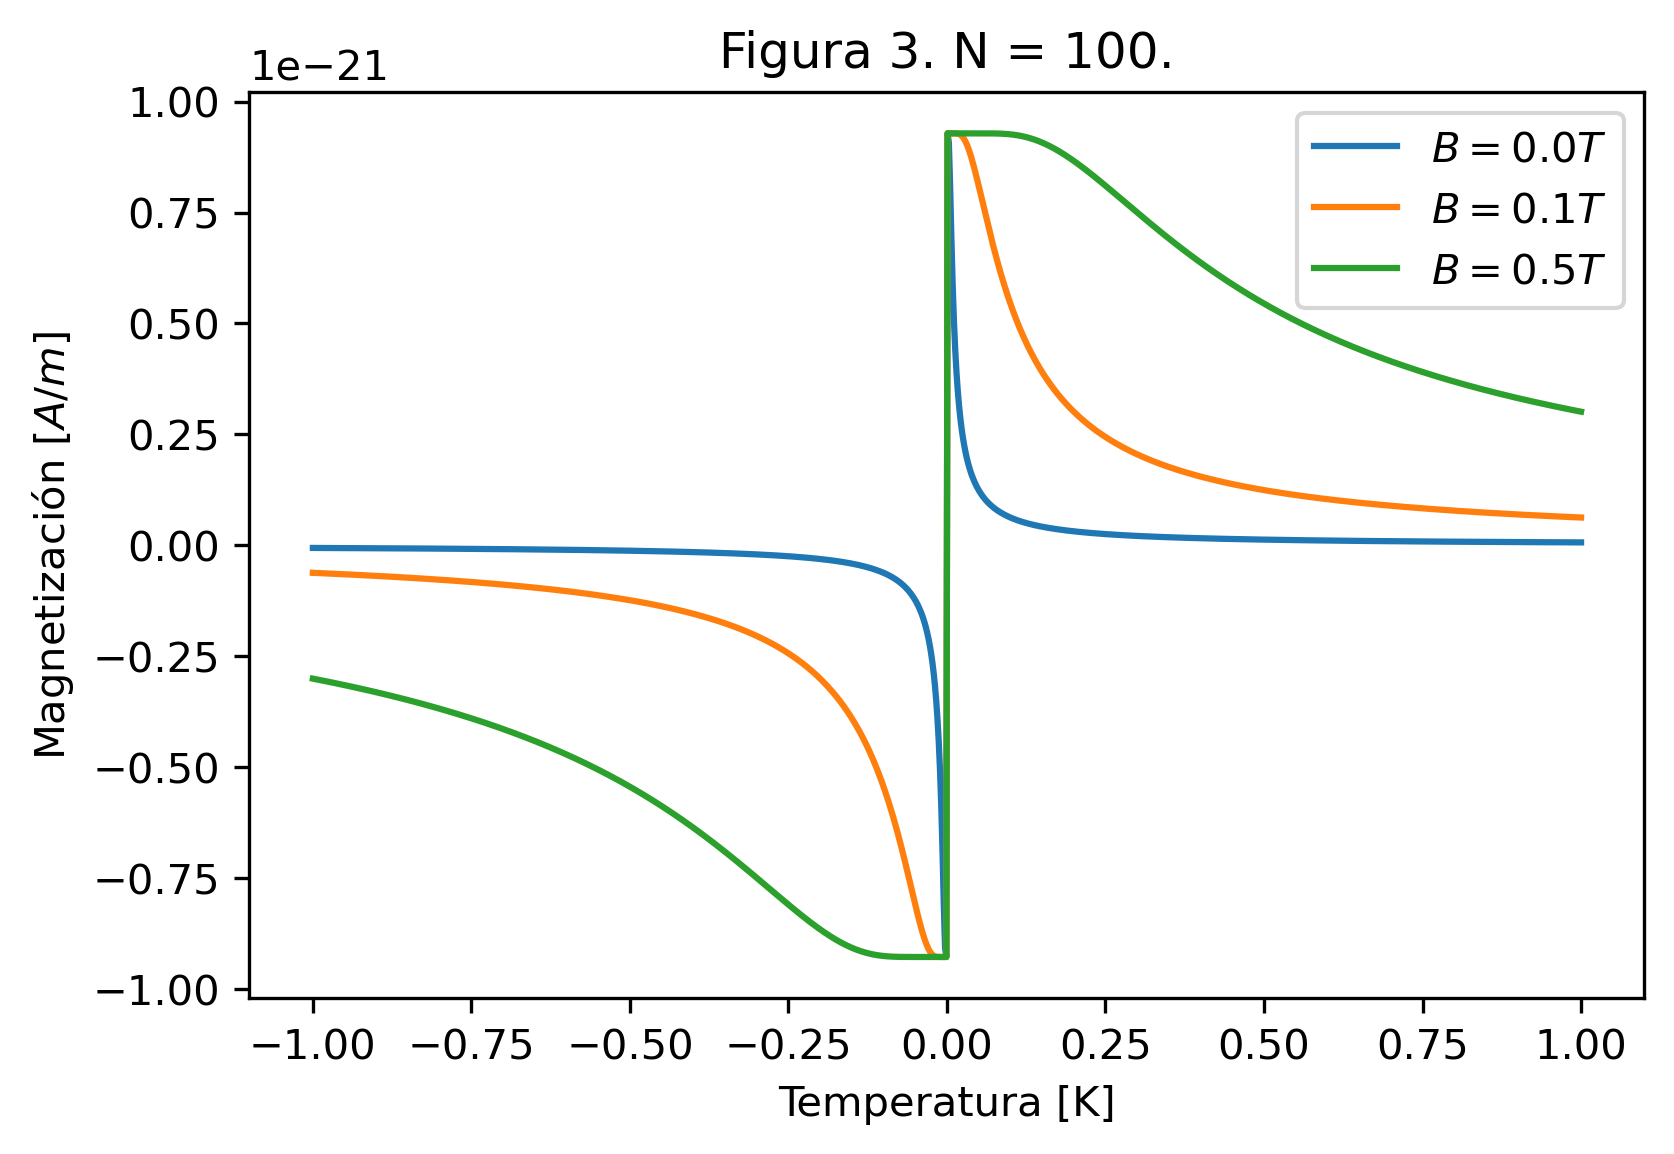

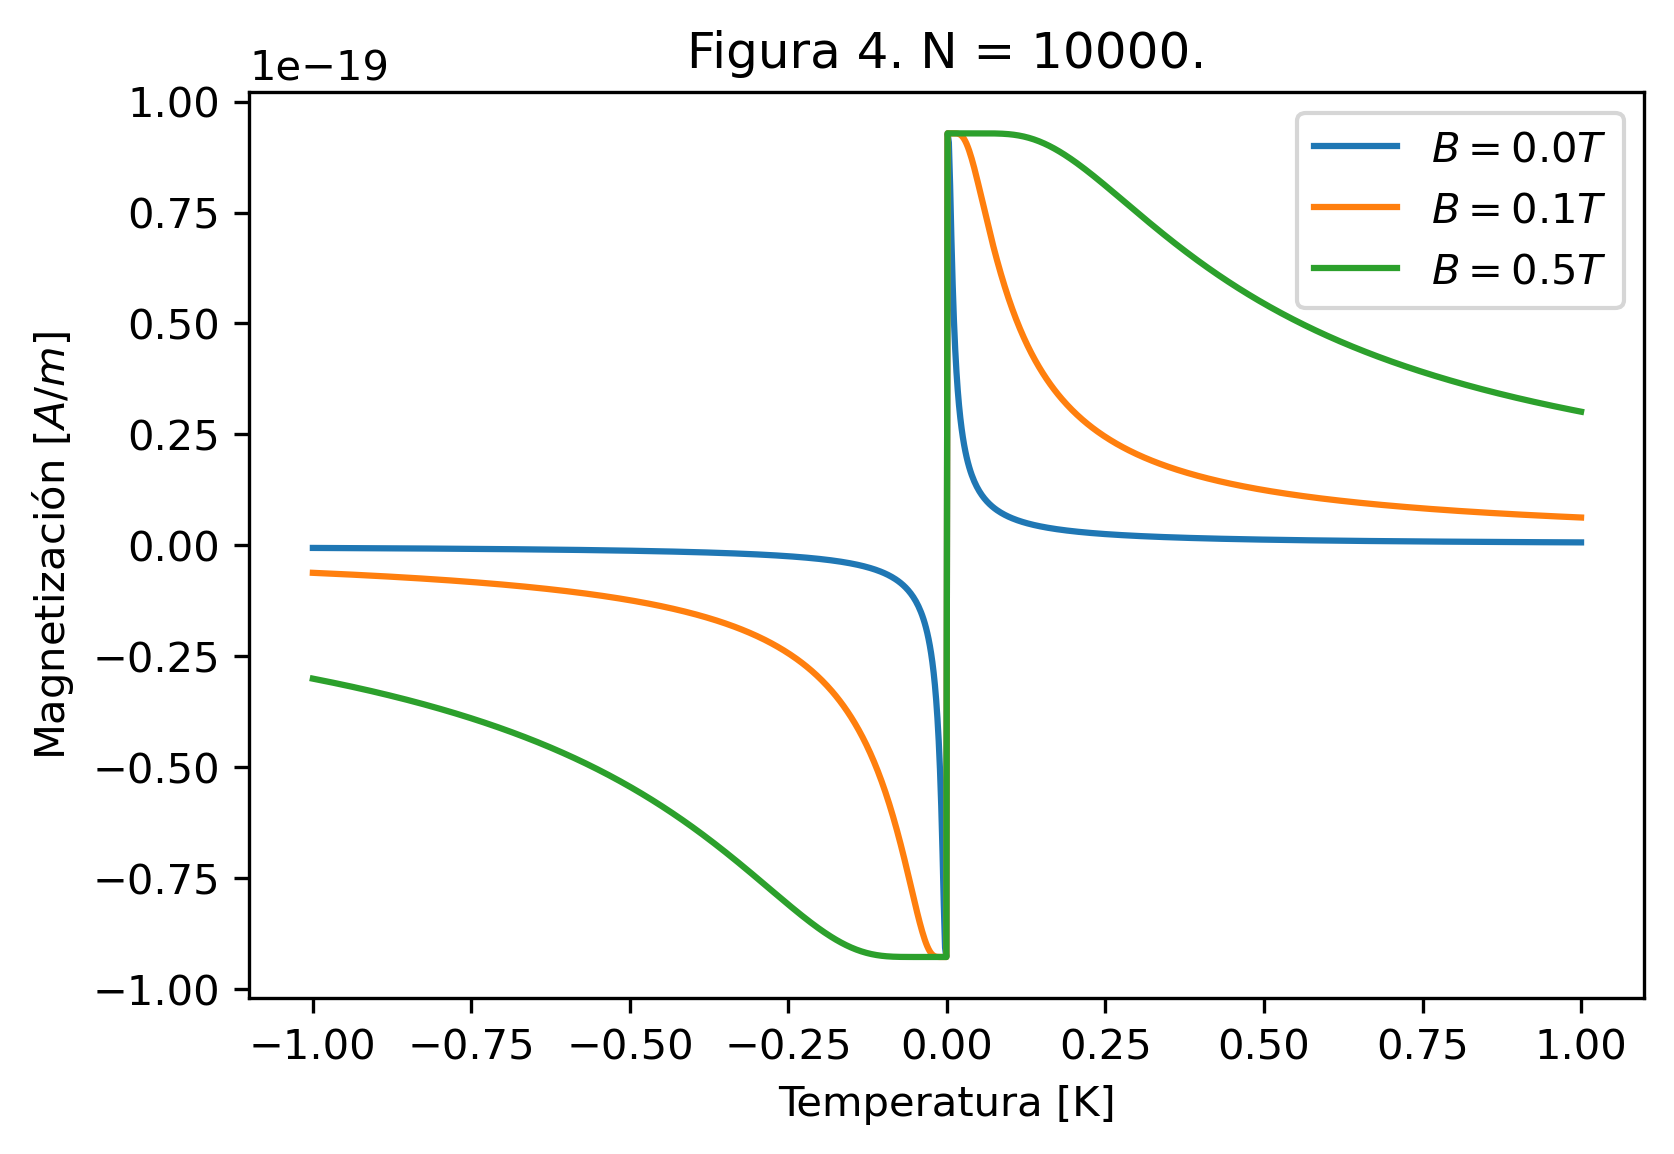

In [11]:
last_idx = idx
fig = {}; idx = 0
for n, b in it.product(N, B):
    M = magnetization(n, b, T) 
    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (last_idx+fig[n], n))
    plt.plot(T, M, label=r'$B = %0.1f T$' % (b))
    plt.xlabel('Temperatura [K]')
    plt.ylabel(r'Magnetización $[A/m]$')
for i in range(idx):
    plt.figure(i+1)
    _ = plt.legend()

#### 5.3.2. Suposición de continuidad en la magnetización cuando la temperatura absoluta es negativa

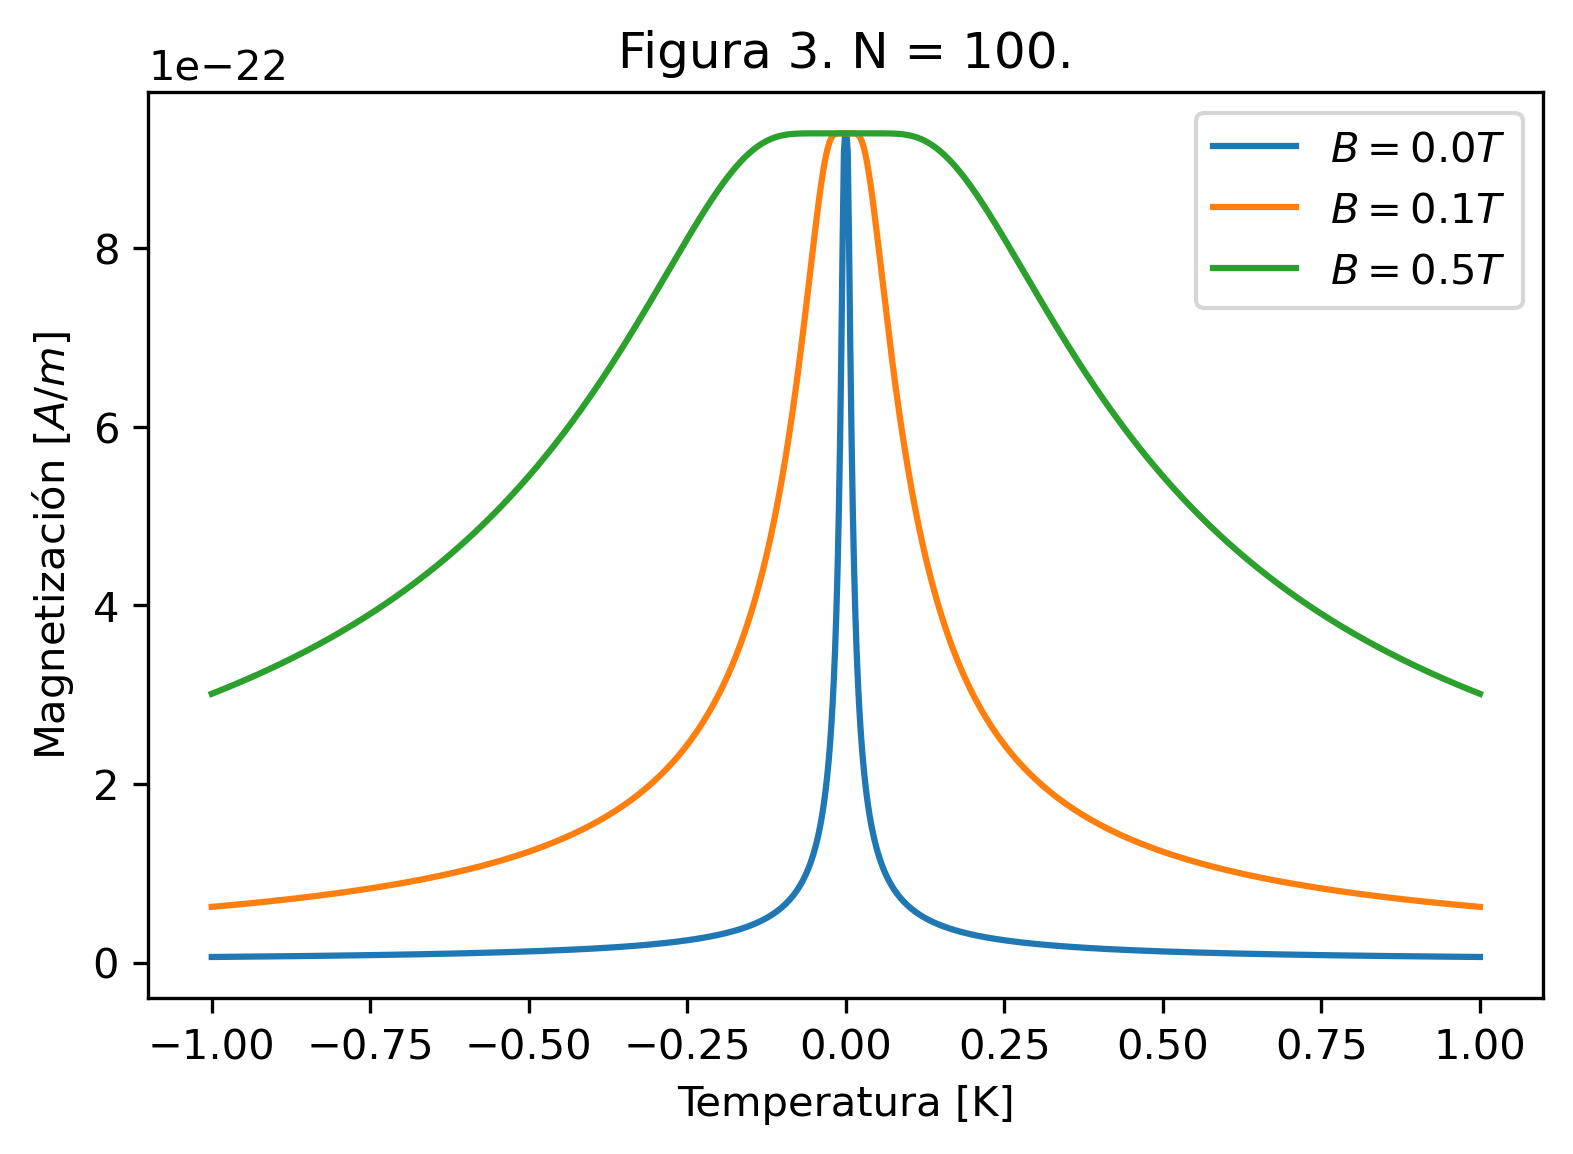

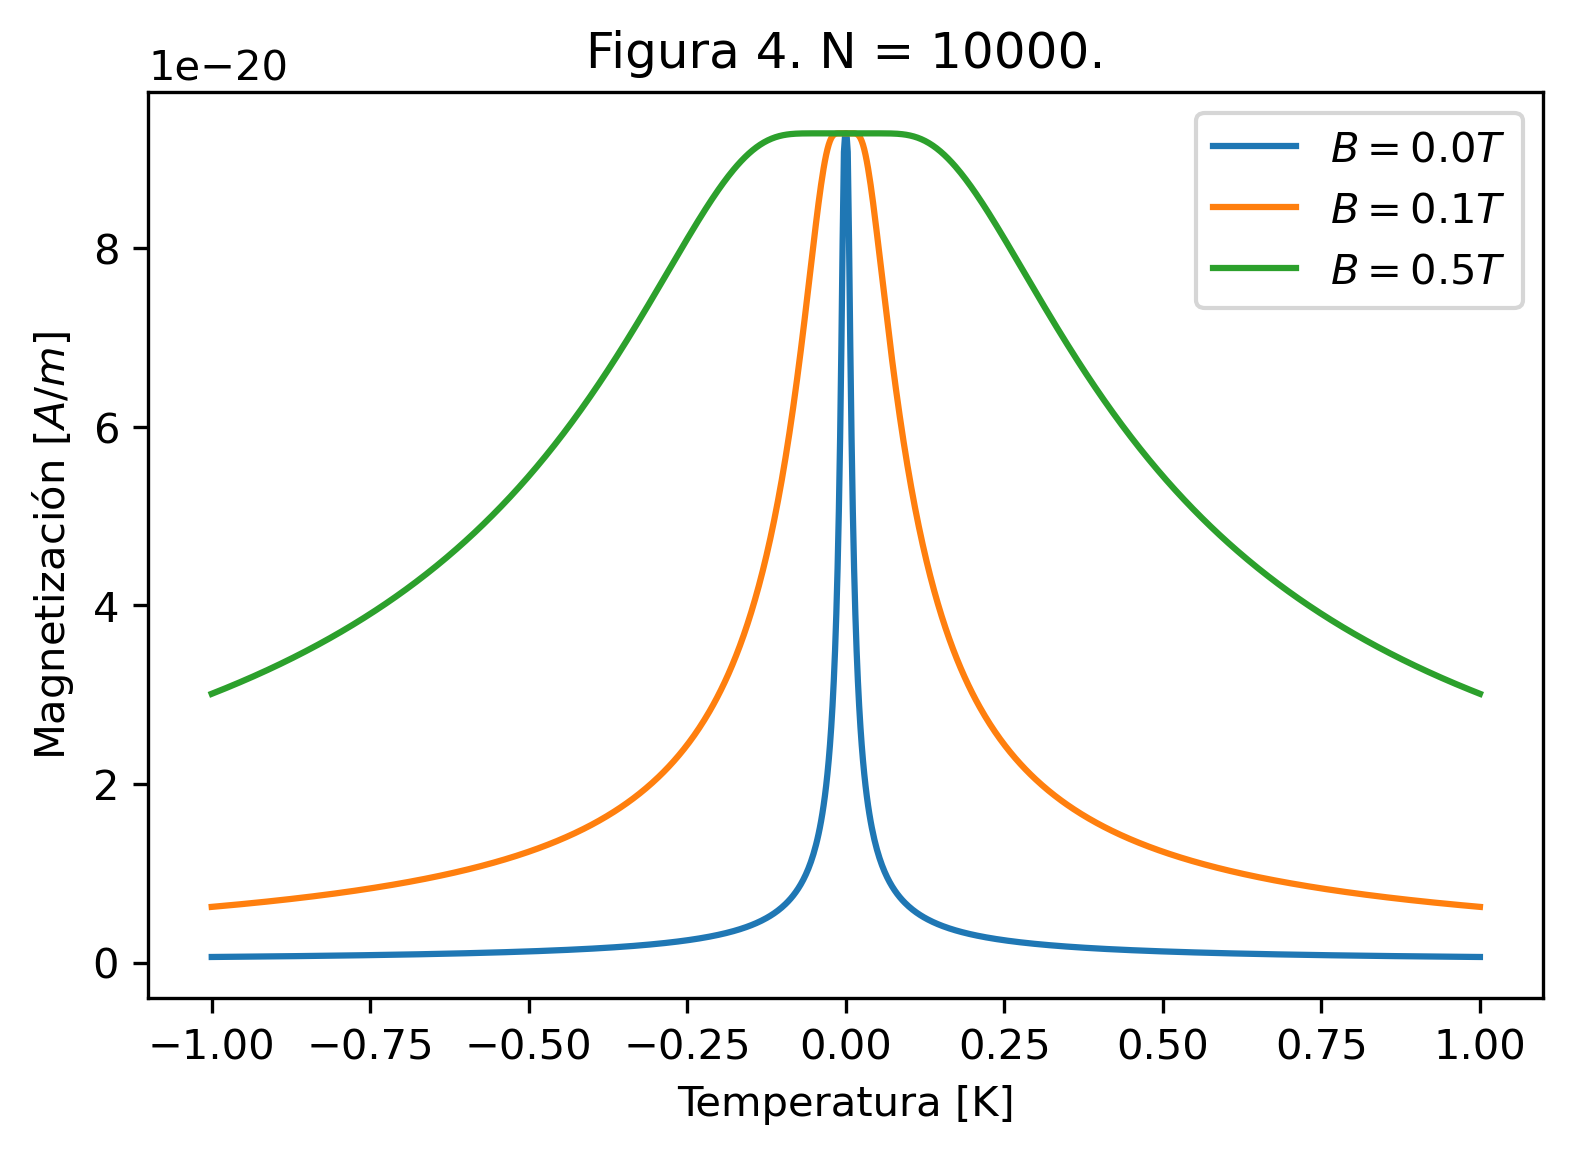

In [12]:
last_idx = idx
fig = {}; idx = 0
for n, b in it.product(N, B):
    M = magnetization(n, b, T) 
    M[T<0] *= -1
    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (last_idx+fig[n], n))
    plt.plot(T, M, label=r'$B = %0.1f T$' % (b))
    plt.xlabel('Temperatura [K]')
    plt.ylabel(r'Magnetización $[A/m]$')
for i in range(idx):
    plt.figure(i+1)
    _ = plt.legend()

## 6. Preguntas de autoexplicación

### 6.1. Primer bloque de preguntas

6.1.1. Deduzca la ecuación (1).

6.1.2. Deduzca la ecuación (2).

6.1.3. Deduzca la ecuación (3).

6.1.4. ¿Bajo qué condiciones el término $tanh \left( \frac{\mu B}{k_B T} \right)$ se vuelve relevante en las ecuaciones (2) y (3)?

6.1.5. Describa, con sus propias palabras, qué es la temperatura absoluta y cómo se relaciona con el número de estados accesibles $\Omega$.

### 6.2. Segundo bloque de preguntas

6.2.1. ¿Cuál es la condición para que la temperatura absoluta sea negativa?

6.2.2. Interprete la temperatura absoluta negativa en términos del número de estados accesibles $\Omega$, la energía $E$ y la entropía $S$.

6.2.3. ¿Considera razonable suponer que la energía sea una función continua de la temperatura, incluso en el límite de temperaturas absolutas negativas? ¿Qué implicaciones físicas tiene dicha suposición? Argumente su respuesta.

6.2.4. ¿Considera razonable suponer que la magnetización sea una función continua de la temperatura, incluso en el límite de temperaturas absolutas negativas? ¿Qué implicaciones físicas tiene dicha suposición? Argumente su respuesta.

6.2.5. ¿Es razonable suponer la existencia de temperaturas absolutas negativas o es solo un artificio matemático? ¿Qué implicaciones físias tiene la dicha suposición? Argumente su respuesta, para ello se sugiere realizar las lecturas sugeridas en el ítem 7.

## 7. Lecturas sugeridas

+ Purcell and Pound. A Nuclear Spin System at Negative Temperature. [Phys. Rev. 81 (1951) 279](https://journals.aps.org/pr/abstract/10.1103/PhysRev.81.279).
+ Dunkel and Hilbert. Consistent thermostatistics forbids negative absolute temperatures. [Nature Physics 10 (2014) 67-72](https://www.nature.com/articles/nphys2815).
+ Abraham and Penrose. Physics of negative absolute temperatures. [Phys. Rev. E 95 (2017) 012125](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.012125).

End!